In [18]:
import sys
sys.path.append("..")

In [19]:
from library.simulator import BackTester
from library.runner import Runner
from library.strategy import GoldenCrossStrategy
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# CSVデータを読み込む
df = pd.read_csv(
    "../input_data/btf_periods900.csv",
)
# UNIXtimeをpandas.Timestampに変換する
df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")

rename_dict = {
    "CloseTime": "timestamp",
    "OpenPrice": "open",
    "HighPrice": "high",
    "LowPrice": "low",
    "ClosePrice": "close",
    "Volume": "volume",
}
df = df[list(rename_dict.keys())].rename(columns=rename_dict).set_index("timestamp")

config = {"slippage": 0.001, "minutes_to_expire": 600}
tester = BackTester(df, config)


In [37]:
strategy = GoldenCrossStrategy(df = tester.ohlcv_df,length_long=30, length_short=15, length_expire=10)
runner = Runner(tester=tester, strategy=strategy)
runner.run()
snapshots = tester.snapshots
#print(snapshots)

In [42]:
for order in tester.archived_orders:
    print(order.__dict__)

{'id': 1104, 'timestamp': Timestamp('2023-01-27 06:30:00'), 'side': 'BUY', 'size': 0.16686679557682849, 'result': OrderResult(completion_time=Timestamp('2023-01-27 06:45:00'), completion_status='executed', cash_diff=-500598.217462143, position_diff=0.16686679557682849)}
{'id': 1105, 'timestamp': Timestamp('2023-01-27 09:00:00'), 'side': 'SELL', 'size': 0.16686679557682849, 'result': OrderResult(completion_time=Timestamp('2023-01-27 09:15:00'), completion_status='executed', cash_diff=497853.2586749041, position_diff=-0.16686679557682849)}
{'id': 1106, 'timestamp': Timestamp('2023-01-27 15:45:00'), 'side': 'BUY', 'size': 0.16603118810181502, 'result': OrderResult(completion_time=Timestamp('2023-01-27 16:00:00'), completion_status='executed', cash_diff=-495807.8129388474, position_diff=0.16603118810181502)}
{'id': 1107, 'timestamp': Timestamp('2023-01-27 18:15:00'), 'side': 'SELL', 'size': 0.16603118810181502, 'result': OrderResult(completion_time=Timestamp('2023-01-27 18:30:00'), complet

- ポジション解消に失敗している

In [39]:
snapshots.loc['2023-02-18 06:15:00']

cash         962230.028637
position          0.000000
valuation    962230.028637
Name: 2023-02-18 06:15:00, dtype: float64

In [40]:
for o in tester.archived_orders:
    if o.id == 1219:
        print(o.side, o.size, o.result.completion_status)

SELL 0.1501073888805799 executed


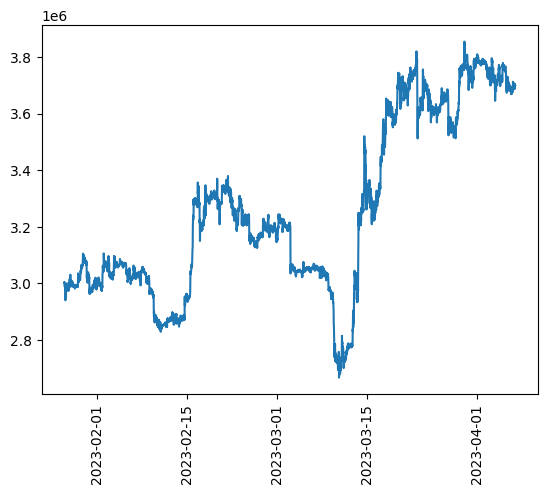

In [41]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(tester.ohlcv_df.index, tester.ohlcv_df["close"])
plt.show()

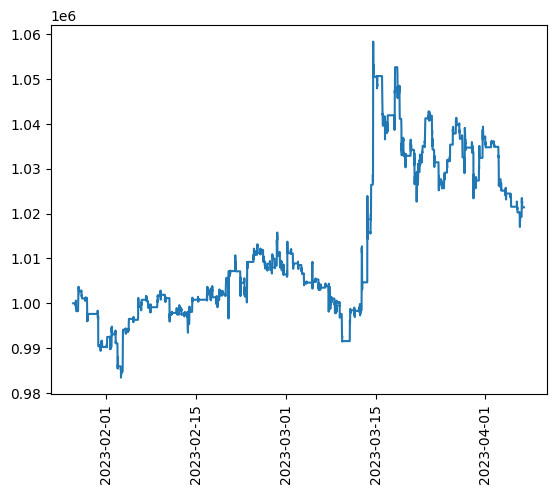

In [34]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(snapshots.index, snapshots["valuation"])
plt.show()

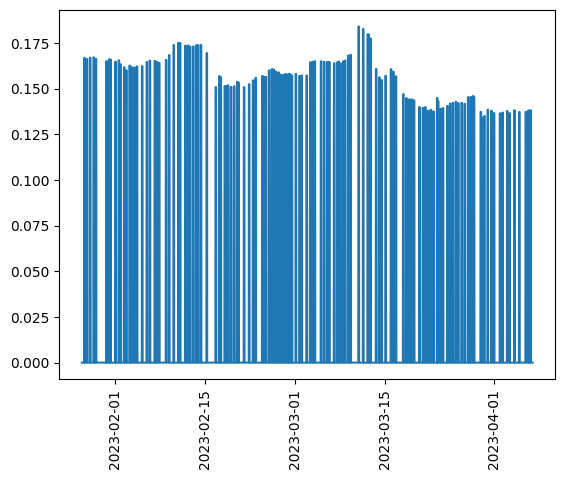

In [35]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(snapshots.index, snapshots["position"])
plt.show()